### Тема проекта: Выявление успешных платформ и популярных жанров

### План проекта:
- подготовка данных
- поиск самых прибыльных за все время платформ и их анализ
- оценка влияния отзывов пользователей и критиков на продажи игр
- определение популярных платформ и жанров в разных регионах
- сравнение средних пользовательских рейтингов PC и XOne
- сравнение пользовательских рейтингов жанров Action и Sports
- вывод

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/games.csv')

## Подготовка данных

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
 data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')

Перевел пользовательскую оценку в числовой вариант, заменил 'tbd' значения в процессе на NaN. 'tbd' расшифровывается как 'будет определено', следовательно эти данные не дают возможности оценить пользовательский рейтинг, и можно сделать вывод, что они ничем существенно не отличаются от NaN, которые так же не дают нам сделать выводов о пользовательской оценке.

In [7]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 игры, не имеющие названия и жанр, оставлю в данных, эти 2 игры имеют продажи и год

In [8]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Часть игр не имеет года продажи, по ним мы не сможем определить, в какие годы какая платформа приносила больше. Зато они окажут существенное влияние на суммарные продажи по платформам. Заменим пропущенные годы на ноль.

Пропуски в оценках критиков и в рейтинге я оставлю без именений, потому что эти значения мне нечем заполнить, а присвоение этим графам полученные каким нибудь способом значения, может сделать анализ неточным.

In [9]:
data['sum'] = data['na_sales'] +  data['eu_sales'] +  data['jp_sales'] +  data['other_sales']
data['count'] = 1

In [10]:
data['year_of_release'] = data['year_of_release'].fillna(0)
year_sales_data = data.pivot_table(
    index = ['year_of_release','platform', ], 
    values = ['na_sales','eu_sales','jp_sales','other_sales', 'sum','count'],
    aggfunc = {'na_sales':np.sum,
               'eu_sales':np.sum,
               'jp_sales':np.sum,
               'other_sales':np.sum, 
               'sum':np.sum,
               'count':'count'
              }
)
platform_sales_data = data.pivot_table(
    index = ['platform','year_of_release', ], 
    values = ['na_sales','eu_sales','jp_sales','other_sales', 'sum','count'],
    aggfunc = {'na_sales':np.sum,
               'eu_sales':np.sum,
               'jp_sales':np.sum,
               'other_sales':np.sum, 
               'sum':np.sum,
               'count':'count'
              }
)

In [11]:
year_sales_data

count  eu_sales  jp_sales  na_sales  other_sales  \
year_of_release platform                                                     
0.0             2600         17      0.61      0.00      9.82         0.07   
                3DS           8      0.21      0.05      0.84         0.09   
                DS           30      0.48      0.55      2.09         0.22   
                GB            1      0.31      0.00      0.68         0.04   
                GBA          11      0.66      0.77      3.42         0.12   
...                         ...       ...       ...       ...          ...   
2016.0          PSV          85      0.39      3.56      0.15         0.15   
                Wii           1      0.11      0.00      0.06         0.01   
                WiiU         14      1.48      0.67      2.10         0.35   
                X360         13      0.71      0.00      0.69         0.12   
                XOne         87      9.63      0.01     14.27         2.24   

                            sum  
year_of_release platform         
0.0             2600      10.50  
                3DS        1.19  
                DS         3.34  
                GB         1.03  
                GBA        4.97  
...                         ...  
2016.0          PSV        4.25  
                Wii        0.18  
                WiiU       4.60  
                X360       1.52  
                XOne      26.15  

[254 rows x 6 columns]

In [12]:
platform_sales_data

count  eu_sales  jp_sales  na_sales  other_sales  \
platform year_of_release                                                     
2600     0.0                 17      0.61      0.00      9.82         0.07   
         1980.0               9      0.67      0.00     10.59         0.12   
         1981.0              46      1.96      0.00     33.40         0.32   
         1982.0              36      1.65      0.00     26.92         0.31   
         1983.0              11      0.34      0.00      5.44         0.06   
...                         ...       ...       ...       ...          ...   
XB       2008.0               1      0.04      0.00      0.13         0.01   
XOne     2013.0              19      5.34      0.02     11.85         1.75   
         2014.0              61     18.15      0.14     30.97         4.81   
         2015.0              80     18.47      0.17     36.03         5.47   
         2016.0              87      9.63      0.01     14.27         2.24   

                            sum  
platform year_of_release         
2600     0.0              10.50  
         1980.0           11.38  
         1981.0           35.68  
         1982.0           28.88  
         1983.0            5.84  
...                         ...  
XB       2008.0            0.18  
XOne     2013.0           18.96  
         2014.0           54.07  
         2015.0           60.14  
         2016.0           26.15  

[254 rows x 6 columns]

In [13]:
platforms = data['platform'].unique().tolist()
years = sorted(data[data['year_of_release']>0]['year_of_release'].unique().tolist())

In [14]:
data.groupby('year_of_release').count()['count']

year_of_release
0.0        269
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64

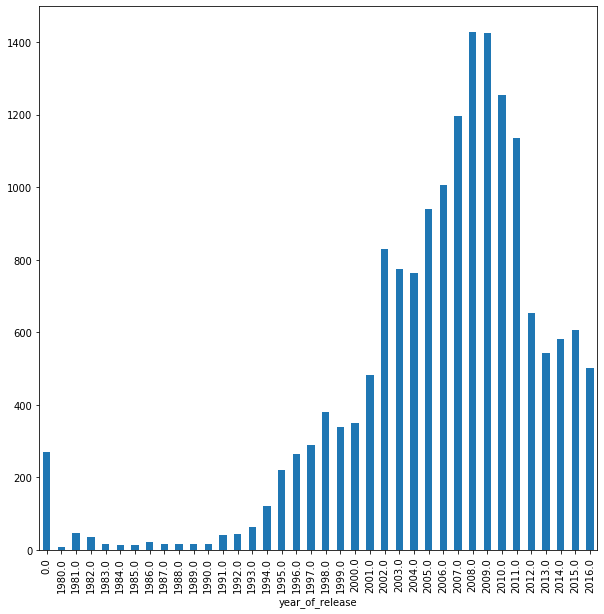

In [15]:
data.groupby('year_of_release').count()['count'].plot.bar(figsize = [10,10])

Количество игр выпущенных за год не постоянно, пик пришелся на 2002 - 2010

## Поиск самых прибыльных за все время платформ и их анализ

Определим 5 самых прибыльных платформ.

In [16]:
plat_sales = data.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
plat_sales

,eu_sales,jp_sales,na_sales
platform,,,
2600,5.47,0.00,90.60
3DO,0.00,0.10,0.00
3DS,61.48,100.67,83.49
DC,1.69,8.56,5.43
DS,188.89,175.57,382.40
GB,47.82,85.12,114.32
GBA,75.25,47.33,187.54
GC,38.71,21.58,133.46
GEN,6.05,2.70,21.05


In [17]:
plat_sales['sum'] = plat_sales['eu_sales'] + plat_sales['jp_sales'] + plat_sales['na_sales']
plat_sales.sort_values(by = 'sum', ascending = False).head(6)

,eu_sales,jp_sales,na_sales,sum
platform,,,,
PS2,339.29,139.20,583.84,1062.33
X360,270.76,12.43,602.47,885.66
Wii,262.21,69.33,496.90,828.44
PS3,330.29,80.19,393.49,803.97
DS,188.89,175.57,382.40,746.86
PS,213.61,139.82,336.52,689.95


Самыми прибыльными оказались: PS2, X360, Wii, PS3, DS.

In [18]:
top_platforms = ['PS2', 'X360', 'Wii', 'PS3', 'DS']

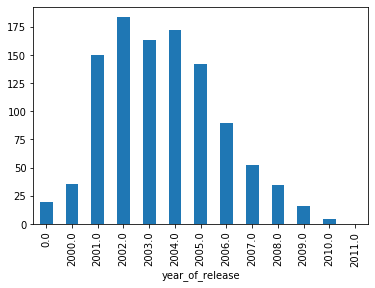

In [19]:
pc = data[data['platform'] == 'PS2'].pivot_table(index=['year_of_release'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
pc['sum'] = pc['eu_sales'] + pc['jp_sales'] + pc['na_sales']
pc['sum'].plot.bar()

Платформа была жива с 2000 по 2010 год, после чего её продажи упали до нуля, пик продаж пришелся на 2001 - 2005 года, после чего прибыль начала постепенно падать.

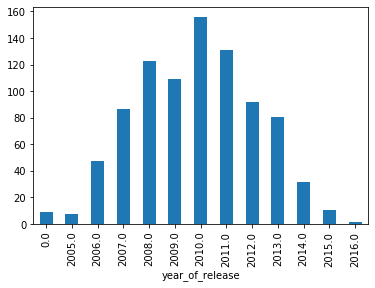

In [20]:
X360 = data[data['platform'] == 'X360'].pivot_table(index=['year_of_release'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
X360['sum'] = X360['eu_sales'] + X360['jp_sales'] + X360['na_sales']
X360['sum'].plot.bar()

Платформа была жива с 2005 по 2016 год, после чего её продажи упали до нуля, пик продаж пришелся на 2007 - 2013 года, после чего прибыль начала постепенно падать.

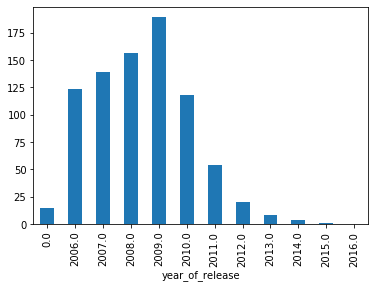

In [21]:
Wii = data[data['platform'] == 'Wii'].pivot_table(index=['year_of_release'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
Wii['sum'] = Wii['eu_sales'] + Wii['jp_sales'] + Wii['na_sales']
Wii['sum'].plot.bar()

Платформа была жива с 2006 по 2015 год, после чего её продажи упали до нуля, пик продаж пришелся на 2006 - 2010 года, после чего прибыль начала резко падать.

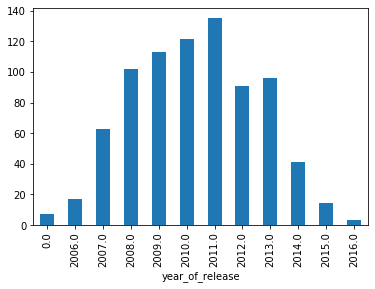

In [22]:
PS3 = data[data['platform'] == 'PS3'].pivot_table(index=['year_of_release'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
PS3['sum'] = PS3['eu_sales'] + PS3['jp_sales'] + PS3['na_sales']
PS3['sum'].plot.bar()

Платформа была жива с 2006 по 2016 год, после чего её продажи упали, пик продаж пришелся на 2008 - 2013 года, после чего прибыль начала резко падать.

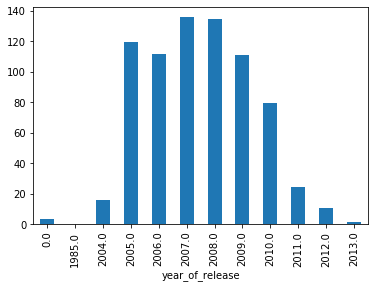

In [23]:
DS = data[data['platform'] == 'DS'].pivot_table(index=['year_of_release'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
DS['sum'] = DS['eu_sales'] + DS['jp_sales'] + DS['na_sales']
DS['sum'].plot.bar()

Платформа была жива с 2000 по 2010 год, после чего её продажи упали до нуля, пик продаж пришелся на 2001 - 2005 года, после чего прибыль начала постепенно падать.

Посмотрев на графики каждой платформы, можно сделать вывод, что время жизни или популярности платформы равняется примерно 10ти годам, а популярность к ним приходит на второй/третий год появления.

## Поиск самых перспективных платформ на 2017 год и их сравнение

Можно предположить, какие платформы будут популярны в 2017, основываясь на длительности существования платформы и том, как она показала себя в первый и второй год.

Для этого я найду все платформы не старше трех лет.


In [24]:
bad_platforms = data.query('year_of_release < 2013')['platform'].unique().tolist()
for i in platforms:
    if i not in bad_platforms:
        print(i)

PS4
XOne


In [25]:
platform_sales_data.loc['PS4']

,count,eu_sales,jp_sales,na_sales,other_sales,sum
year_of_release,,,,,,
2013.0,16,11.05,0.94,10.13,3.87,25.99
2014.0,75,46.50,2.97,34.75,15.78,100.00
2015.0,137,51.76,6.31,42.37,18.46,118.90
2016.0,164,31.78,5.74,21.49,10.24,69.25


In [26]:
platform_sales_data.loc['XOne']

,count,eu_sales,jp_sales,na_sales,other_sales,sum
year_of_release,,,,,,
2013.0,19,5.34,0.02,11.85,1.75,18.96
2014.0,61,18.15,0.14,30.97,4.81,54.07
2015.0,80,18.47,0.17,36.03,5.47,60.14
2016.0,87,9.63,0.01,14.27,2.24,26.15


Основываясь на продолжительности жизни платформ и успешности старта, можно сделать предположение, что в 2017 году, лидерами продаж будут PS4 и XOne, старт и продажи у PS4 лучше чем у XOne, можно предположить, что лидировать будет именно эта платформа.

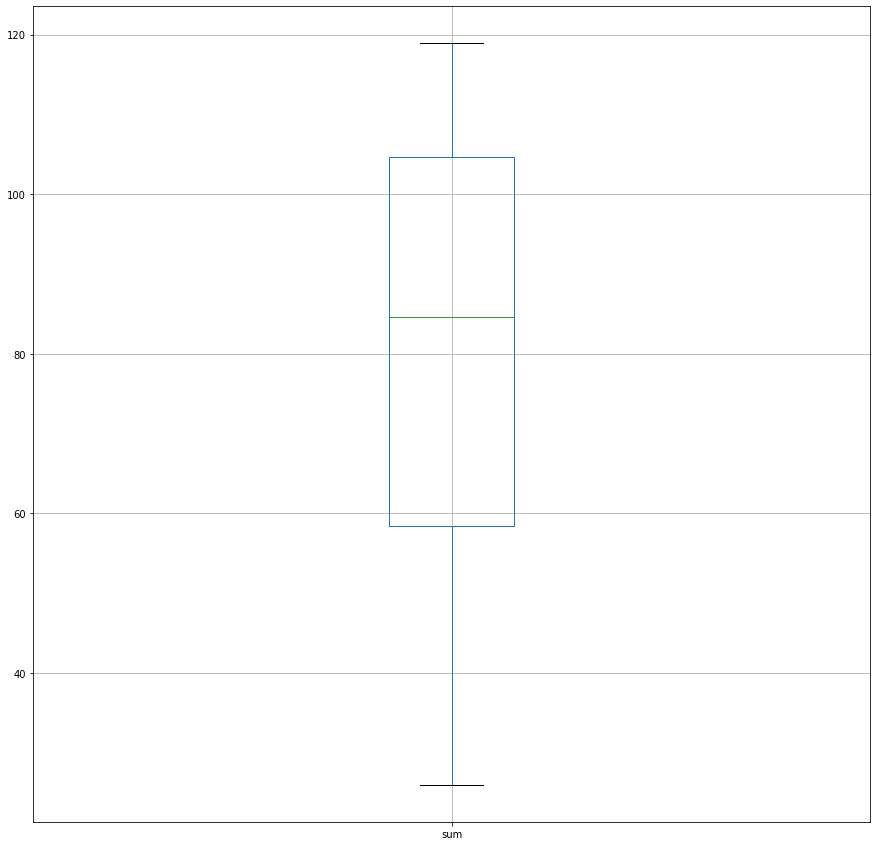

In [27]:
platform_sales_data.loc['PS4'].boxplot(column=['sum'], figsize = [15,15])

In [28]:
ps4_data = data[data['platform'] == 'PS4'].pivot_table(index = ['name'], values = 'sum')
ps4_data.head()

,sum
name,
7 Days to Die,0.14
Adventure Time: Finn & Jake Investigations,0.10
Aegis of Earth: Protonovus Assault,0.02
Agatha Christie's The ABC Murders,0.02
Akiba's Trip: Undead & Undressed,0.11


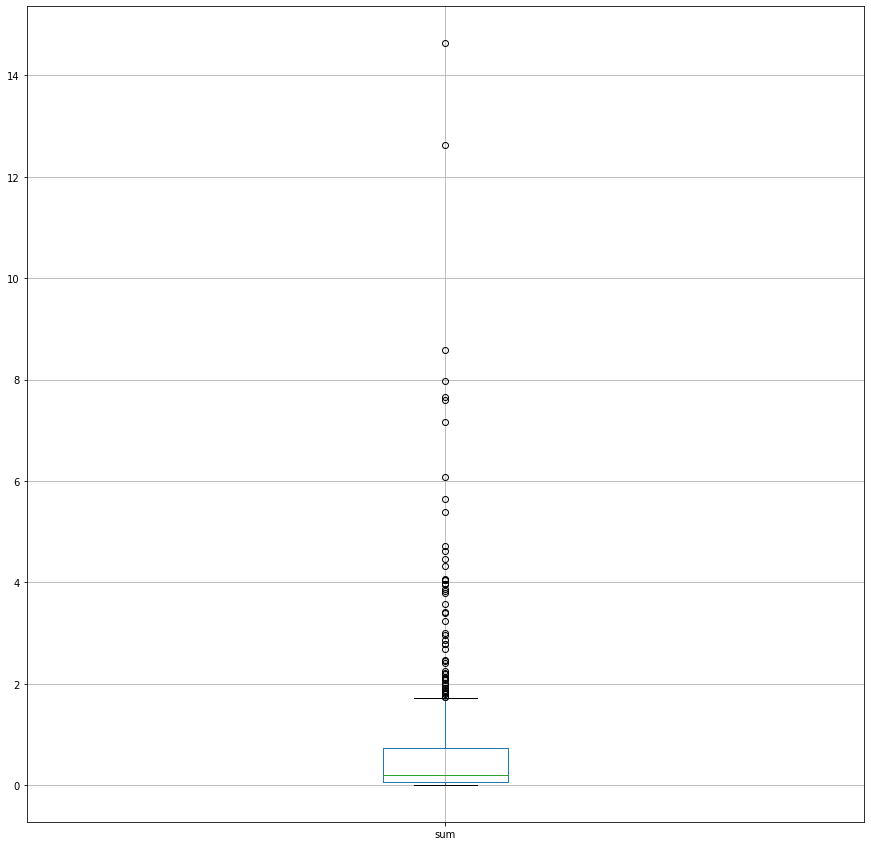

In [29]:
ps4_data.boxplot(figsize = [15,15])

In [30]:
xone_data = data[data['platform'] == 'XOne'].pivot_table(index = ['name'], values = 'sum')
xone_data.head()

,sum
name,
7 Days to Die,0.05
Adventure Time: Finn & Jake Investigations,0.05
Agatha Christie's The ABC Murders,0.01
Alien: Isolation,0.50
Angry Birds Star Wars,0.17


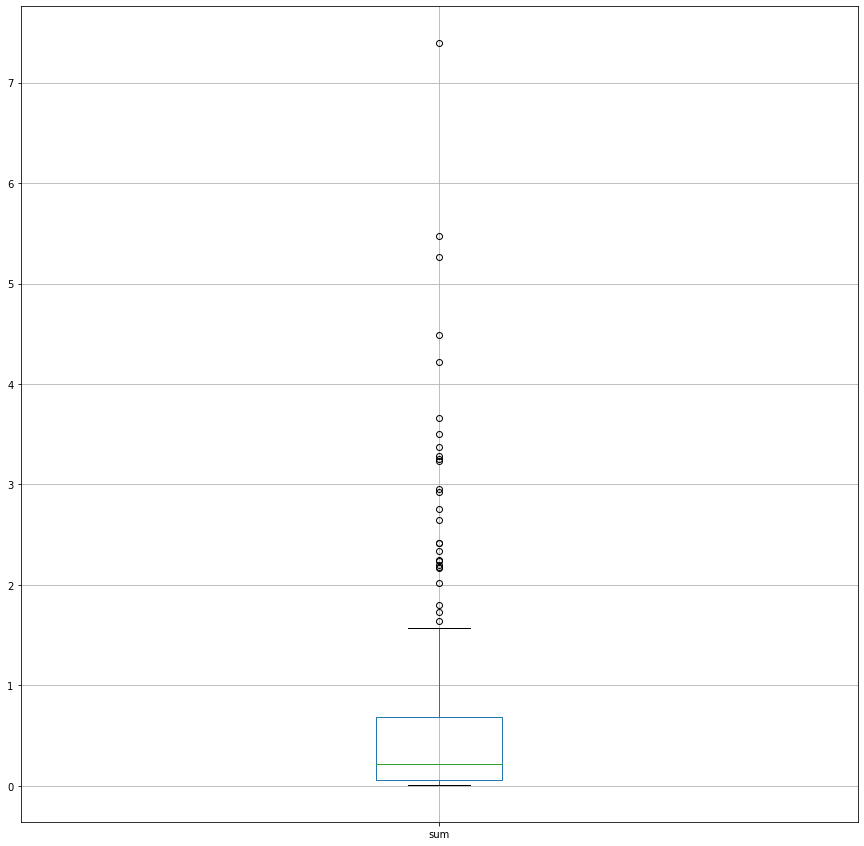

In [31]:
xone_data.boxplot(figsize = [15,15])

Средние продажи у этих двух платформ примерно одинаковые: около полумиллиона, но самая прибыльная игра, на PS4 почти в 2 раза превысила прибыль от самой дорогой игры XOne. Так же игр сильно превышающих среднюю стоимость на PS4 больше.
Можно сделать вывод, что PS4 приносит больше прибыли.

## Оценка влияния отзывов пользователей и критиков на продажи игр

In [32]:
ps_score = data[data['platform'] == 'PS4'][['name', 'critic_score','user_score', 'sum']]
ps_score

,name,critic_score,user_score,sum
31,Call of Duty: Black Ops 3,NaN,NaN,14.63
42,Grand Theft Auto V,97.0,8.3,12.62
77,FIFA 16,82.0,4.3,8.58
87,Star Wars Battlefront (2015),NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,83.0,5.7,7.66
...,...,...,...,...
16500,Root Letter,69.0,7.5,0.01
16503,Shin Hayarigami 2,NaN,NaN,0.01
16526,Dungeons 2,61.0,7.9,0.01
16530,Carmageddon: Max Damage,51.0,5.5,0.01


In [33]:
ps_score['sum'].corr(ps_score['critic_score'])

0.406567902061781

Я вижу достаточно сильную корреляцию между итоговыми сборами игры и оценкой критиков.

In [34]:
ps_score['user_score'].corr(ps_score['sum'])

-0.031957110204556424

А вот пользовательские отзывы практически не влияют на сборы от игры.

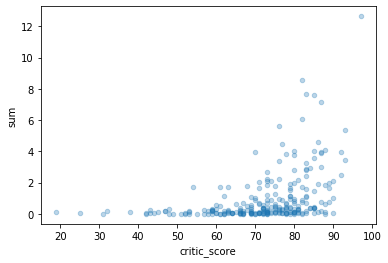

In [35]:
ps_score.plot(x='critic_score', y='sum', kind='scatter', alpha=0.3)

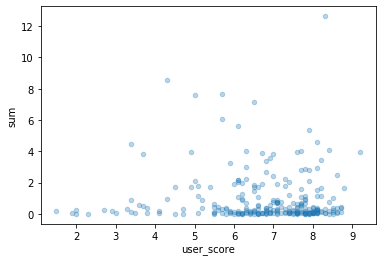

In [36]:
ps_score.plot(x='user_score', y='sum', kind='scatter', alpha=0.3)

Диаграммы рассеяния показывает нам примерно такие же результаты.

In [37]:
data['sum'].corr(data['critic_score'])

0.24550668717736324

In [38]:
data['sum'].corr(data['user_score'])

0.08817911987579136

Если смотреть на корреляцию продаж игр с разных платформ по отзывам, то отзывы критиков имеют меньшее влияние, чем это было при рассмотрении PS4. Отзывы пользователей, все так же почти не влияют на продажи.


<font color='green'>Итак, графики зависимости построены, взаимосвязь оценок и продаж установлено. Действительно, на пhодажи влияют лишь оценки критиков. 

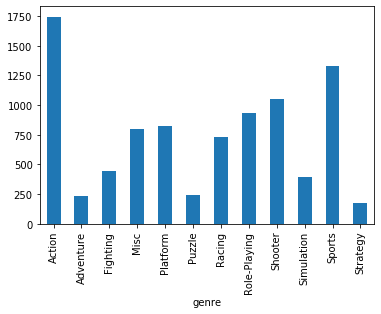

In [39]:
genre_data = data.pivot_table(index = 'genre', values = ['sum', 'count'], aggfunc = 'sum')
genre_data['sum'].plot.bar()

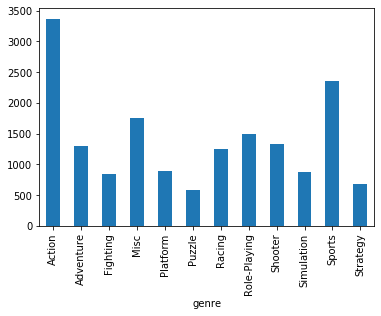

In [40]:
genre_data['count'].plot.bar()

<font color='green'>Я вижу, что ты отлично умеешь строить сводные таблицы. Остается применить это знание в прочих пунктах работы.

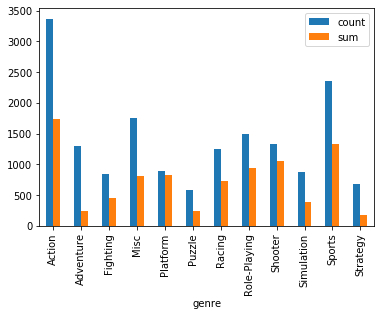

In [41]:
genre_data.plot.bar()

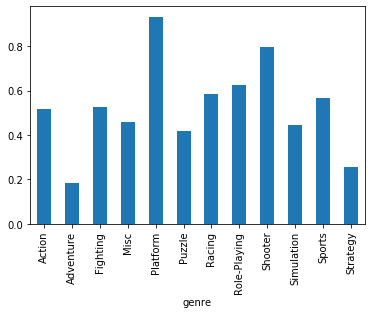

In [42]:
(genre_data['sum']/genre_data['count']).plot.bar()

In [43]:
genre_data['sum']/genre_data['count']

genre
Action          0.517711
Adventure       0.182341
Fighting        0.527126
Misc            0.458577
Platform        0.932173
Puzzle          0.418224
Racing          0.583403
Role-Playing    0.623872
Shooter         0.795503
Simulation      0.446701
Sports          0.566980
Strategy        0.255095
dtype: float64

Больше всего игр в жанре экшн, но они не являются самыми дорогими, самыми дорогими играми являются платформеры и шутеры, а вот стратегии и приключения, приносят меньше всего прибыли.

## Определение популярных платформ и жанров в разных регионах

### Северная Америка

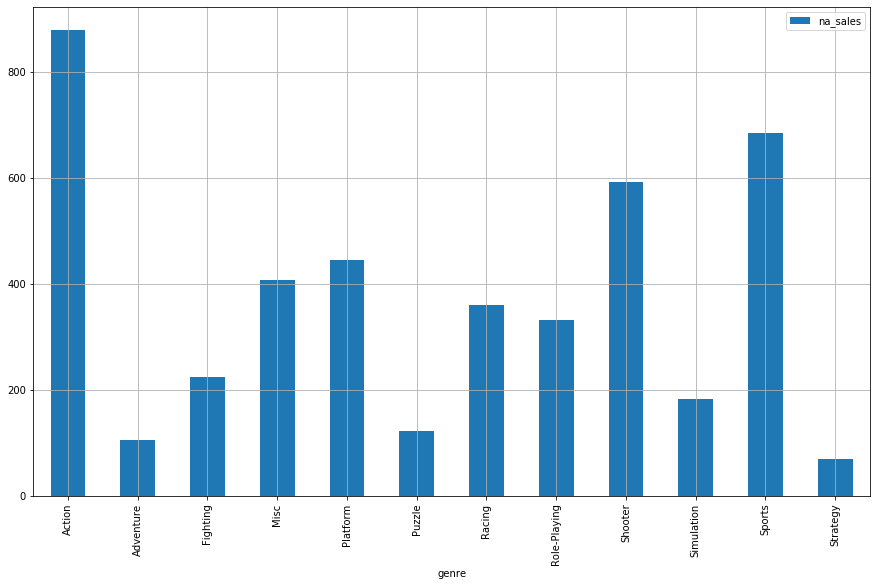

In [44]:
na_genre = data.pivot_table(index = ['genre'], values = ['na_sales'], aggfunc = 'sum')
na_genre.plot.bar(grid = True,figsize = [15,9])

Топ 5 самых популярных жанров в Северной Америке: экшн игры, спортивные игры, шутеры, платформеры и мистические игры.

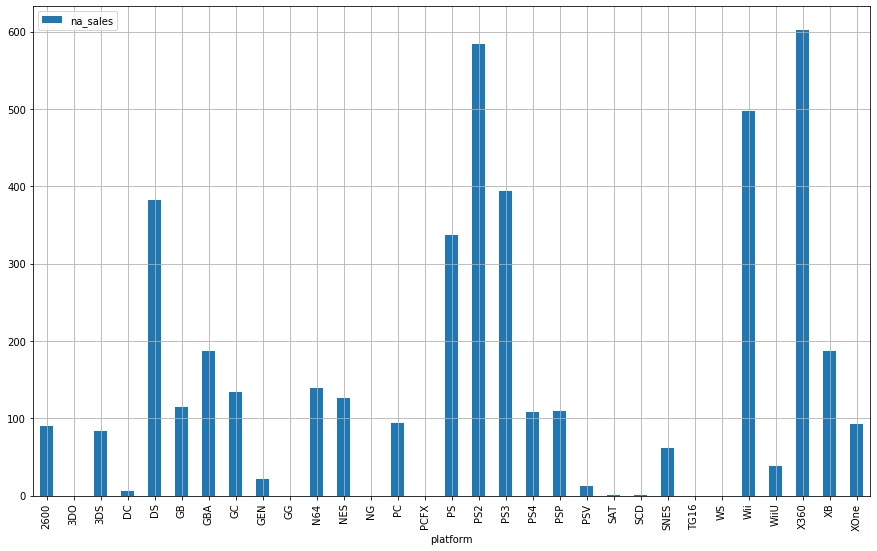

In [45]:
na_platform = data.pivot_table(index = ['platform'], values = ['na_sales'], aggfunc = 'sum')
na_platform.plot.bar(grid = True, figsize = [15,9])

Топ 5 самых популярных платформ в Северной Америке: X360, PS2, Wii, PS3, DS.

In [46]:
na_top = ['X360', 'PS2', 'Wii', 'PS3', 'DS']
na_sale = int(na_platform.sum())
for i in na_top:
    platform_sum = na_platform.loc[i].sum()
    print('доля прибыли платформы {} состовляет {:.2%}'.format(i, (platform_sum/na_sale) ))

доля прибыли платформы X360 состовляет 13.69%
доля прибыли платформы PS2 состовляет 13.26%
доля прибыли платформы Wii состовляет 11.29%
доля прибыли платформы PS3 состовляет 8.94%
доля прибыли платформы DS состовляет 8.69%


        na_sales
rating          
AO          1.26
E        1292.99
E10+      353.32
EC          1.53
K-A         2.56
M         748.48
RP          0.00
T         759.75


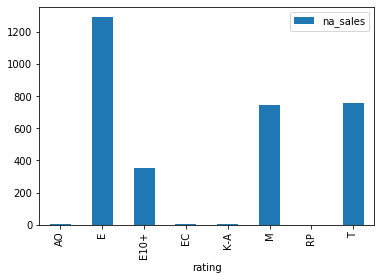

In [47]:
na_rating = data.pivot_table(index = ['rating'], values = ['na_sales'], aggfunc = 'sum')
print(na_rating.head(10))
na_rating.plot.bar()

Игры рейтинга Е самые продаваемые, потом идут T и М.

### Европа

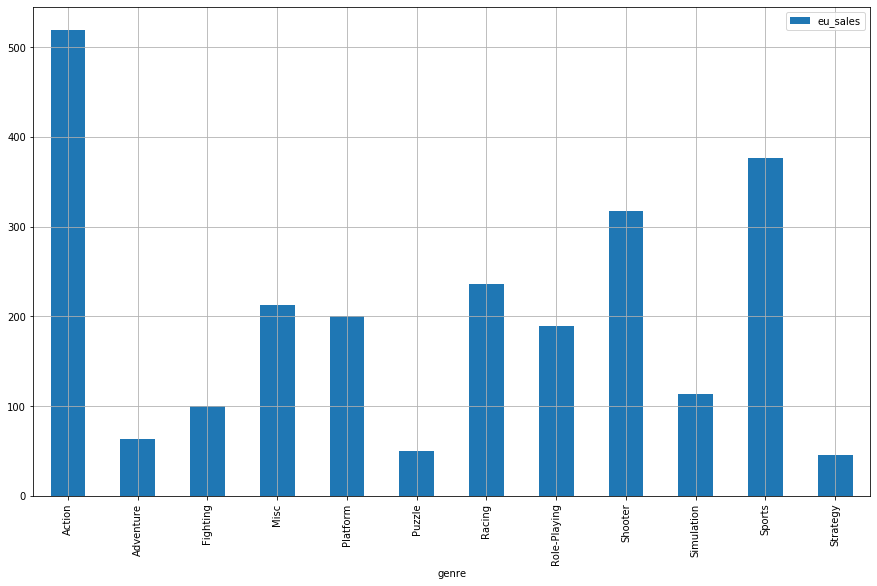

In [48]:
eu_genre = data.pivot_table(index = ['genre'], values = ['eu_sales'], aggfunc = 'sum')
eu_genre.plot.bar(grid = True,figsize = [15,9])

Топ 5 самых популярных жанров в Европе: экшн игры, спортивные игры, шутеры, гонки и мистические игры.

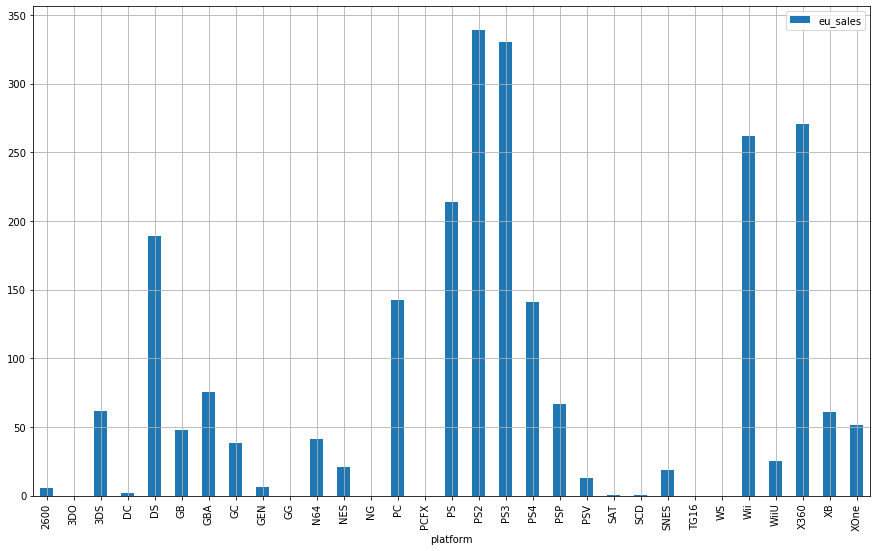

In [49]:
eu_platform = data.pivot_table(index = ['platform'], values = ['eu_sales'], aggfunc = 'sum')
eu_platform.plot.bar(grid = True,figsize = [15,9])

Топ 5 самых популярных платформ в Европе: PS2, PS3, X360, Wii, PS.

In [50]:
eu_top = ['PS2', 'PS3', 'X360', 'Wii', 'PS']
eu_sale = int(eu_platform.sum())
for i in eu_top:
    platform_sum = eu_platform.loc[i].sum()
    print('доля прибыли платформы {} состовляет {:.2%}'.format(i, (platform_sum/eu_sale) ))

доля прибыли платформы PS2 состовляет 14.00%
доля прибыли платформы PS3 состовляет 13.63%
доля прибыли платформы X360 состовляет 11.17%
доля прибыли платформы Wii состовляет 10.82%
доля прибыли платформы PS состовляет 8.81%


        eu_sales
rating          
AO          0.61
E         710.25
E10+      188.52
EC          0.11
K-A         0.27
M         483.97
RP          0.08
T         427.03


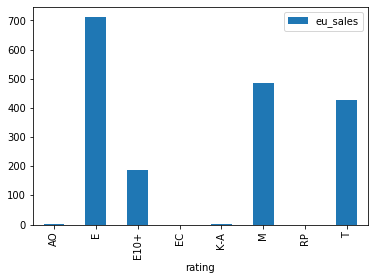

In [51]:
eu_rating = data.pivot_table(index = ['rating'], values = ['eu_sales'], aggfunc = 'sum')
print(eu_rating.head(10))
eu_rating.plot.bar()

Игры рейтинга Е самые продаваемые, потом идут М и Т.

### Япония

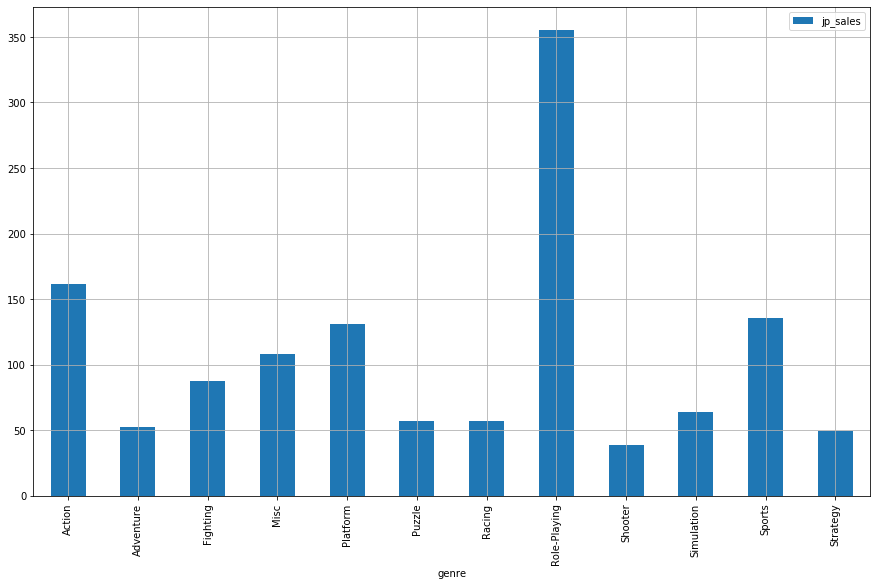

In [52]:
jp_genre = data.pivot_table(index = ['genre'], values = ['jp_sales'], aggfunc = 'sum')
jp_genre.plot.bar(grid = True,figsize = [15,9])

Топ 5 самых популярных жанров в Японии: ролевые игры, экшн игры, спортивные игры, платформеры спортивные игры и мистические игры.

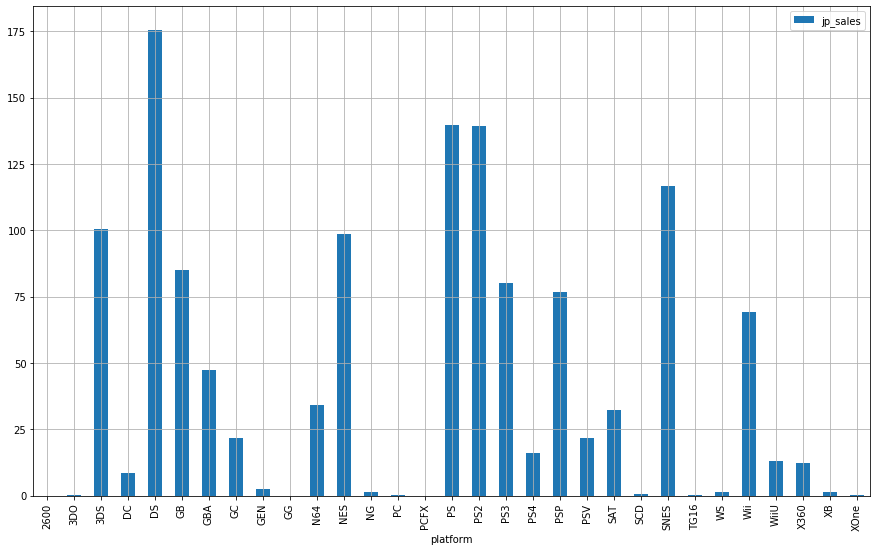

In [53]:
jp_platform = data.pivot_table(index = ['platform'], values = ['jp_sales'], aggfunc = 'sum')
jp_platform.plot.bar(grid = True,figsize = [15,9])

Топ 5 самых популярных платформ в Японие: DS, PS, PS2, SNES, 3DS.

In [54]:
jp_top = ['DS', 'PS', 'PS2', 'SNES', '3DS']
jp_sale = int(jp_platform.sum())
for i in jp_top:
    platform_sum = jp_platform.loc[i].sum()
    print('доля прибыли платформы {} состовляет {:.2%}'.format(i, (platform_sum/jp_sale) ))

доля прибыли платформы DS состовляет 13.54%
доля прибыли платформы PS состовляет 10.78%
доля прибыли платформы PS2 состовляет 10.73%
доля прибыли платформы SNES состовляет 8.99%
доля прибыли платформы 3DS состовляет 7.76%


        jp_sales
rating          
AO          0.00
E         198.11
E10+       40.20
EC          0.00
K-A         1.46
M          64.24
RP          0.00
T         151.40


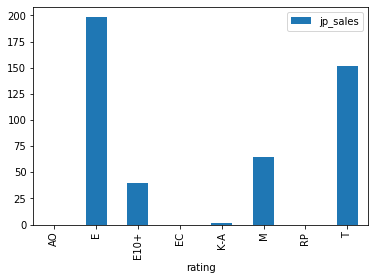

In [55]:
jp_rating = data.pivot_table(index = ['rating'], values = ['jp_sales'], aggfunc = 'sum')
print(jp_rating.head(10))
jp_rating.plot.bar()

Игры рейтинга Е самые продаваемые, потом идут T и М.

В разных регионах жанровые предпочтения существенно отличаются, в Европе и Северной Америке лидирующим жанром является экшн, спротивные игры и шутеры делят второе и третье место, в Японии 2 первых места держат ролевые игры и платформеры.

Продажи по рейтингам в разных регионах почти не оличаются, больше всего продаются игры подгодящие всем возростам.

## Сравнение средних пользовательских рейтингов PC и XOne

In [56]:
pc_score = data[data['platform']== 'PC'].pivot_table(index = 'name', values = 'user_score')
pc_score

,user_score
name,
007: Quantum of Solace,6.3
15 Days,5.8
1701 A.D.,8.3
18 Wheels of Steel: Extreme Trucker,8.0
18 Wheels of Steel: Extreme Trucker 2,8.3
...,...
XCOM: Enemy Unknown,8.2
Zoo Tycoon 2,8.1
Zoo Tycoon 2: Ultimate Collection,8.4


In [57]:
xone_score = data[data['platform']== 'XOne'].pivot_table(index = 'name', values = 'user_score')
xone_score

,user_score
name,
7 Days to Die,5.2
Agatha Christie's The ABC Murders,7.5
Alien: Isolation,7.8
Angry Birds Star Wars,6.9
Arslan: The Warriors of Legend,5.8
...,...
Wolfenstein: The Old Blood,8.0
Worms: WMD,8.1
XCOM 2,8.1


Нулевая гипотеза:
пользовательские рейтинги XOne и PC одинаковые.

Альтернативная: пользовательские рейтинги XOne и PC разные.

In [58]:
alpha=.05

In [59]:
results = st.ttest_ind(
    xone_score, 
    pc_score
)

p = results.pvalue
print("p-value:{:.3}".format(float(*p)))  
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value:1.49e-05
Отвергаем нулевую гипотезу


Проверив гипотезу о том, что пользовательские рейтинги XOne и PC одинаковые, мы получили p уровень значимости меньше 0.05, и мы не можем принять нулевую гипотезу, следовательно принимаем вторую гипотезу: пользовательские рейтинги этих двух платформ отличаются.

Рассмотрев разные районы и предпочтения людей, можно сделать вывод, что предпочтения людей похожи, выделаются только японцы, у которых сместив экшн, на первые места выбились ролевые игры и платформеры. В Северной Америке и Европе топ 5 жанров практически одинаковые, второе и третие места лишь поменялись местами. 


А вот консоли в разных регионах предпочитают разные.

### Сравнение пользовательских рейтингов жанров Action и Sports

In [60]:
action_score = data[data['genre']== 'Action'][ 'user_score']
action_score = action_score.dropna()
action_score

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16652    8.5
16654    5.1
16660    6.7
16663    2.4
16692    7.6
Name: user_score, Length: 1830, dtype: float64

In [61]:
sports_score = data[data['genre']== 'Action']['user_score']
sports_score = sports_score.dropna()
sports_score

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16652    8.5
16654    5.1
16660    6.7
16663    2.4
16692    7.6
Name: user_score, Length: 1830, dtype: float64

Нулевая гипотеза:
    рейтинги спортивных и экшн игр одинаковые.

Альтернативная: 
    рейтинги спортивных и экшн игр разные.

In [62]:
results = st.ttest_ind(
    action_score, 
    sports_score
)

p = results.pvalue
print("p-value:", p)  
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.0
Не получилось отвергнуть нулевую гипотезу


Проверив гипотезу о том, что пользовательские рейтинги спортивных и экшн игр одинаковые, мы получили p уровень значимости больше 0.05, и мы не можем отвергнуть нулевую гипотезу, следовательно пользовательские рейтинги этих двух жанров примерно одинаковые.

В обоих случаях я использовал статистический критерий p, если он меньше 0.05, то тогда я имею основания отвергнуть нулевую гипотезу.

### Вывод

- самые перспективные платформы на 2017 год - PS4 и XOne
- самые перспективные жанры на 2017 год - экшн, спортивные игры, ролевые игры, мистические игры
- общая тенденция ежегодного выпуска игр идет на увелечение, за анализируемый период количество выпускаемых игр выросло в 10 раз
- к 2016 году самыми прибыльными платформами оказались: PC, GB, X360, PSP, PS2
- средняя продолжительность жизни платформы составляет 10 лет, после чего она перестаёт приносить прибыль
- средняя прибыль PS4 и XOne примерно одинаковая, около полумиллиона, но у PS4 чаще встречаются игры, которые сильно превышают этот показатель
- абсолютный лидер среди жанров по популярности в Северной Америке и Европе - экшн, в Японии - ролевые игры 
- популярные жанры в Европе и Северной Америке - спортивные игры, шутеры, гонки и мистические игры
- популярные жанры в Японии - экшн игры, спортивные игры, платформеры, спортивные игры и мистические игры.
- игры, приносящие наибольшую прибыль - платформеры
- в среднем пользовательские оценки на игры на разных платформах отличаются, а оценки по жанрам примерно одинаковые
- пользовательские оценки не имеют сильного влияния на продажи игры
- оценки критиков имеют ощутимое влияние на продажи игры
- доля самой прибыльной платформы не превышает 14% от общей прибыли со всех платформ в этом регионе
- в разных регионах предпочитают несколько разные консоли, в Европе и Северной Америке предпочтения близкие, а Япония выделяется
- В Европе и Северной Америке жанровые предпочтения практически одинаковые, Япония выбивается, предпочитая ролевые игры экшн играм

---